difference b/w clustering and classification?
a) as they are sounding similar ,but they are different classification is supervised learning whereas clustering is unsupervised learning

importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.cluster import KMeans


importing the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv')


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail() # total 200 data points

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
# If we have low amount of datapoints,

# how can we enlarge the present datapoints to train our model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# rename genre to gender in df
df.rename(columns = {'Genre':'Gender'}, inplace = True)

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# we can see that there are no null values and gender is of object dtype
df.describe()# all stats data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


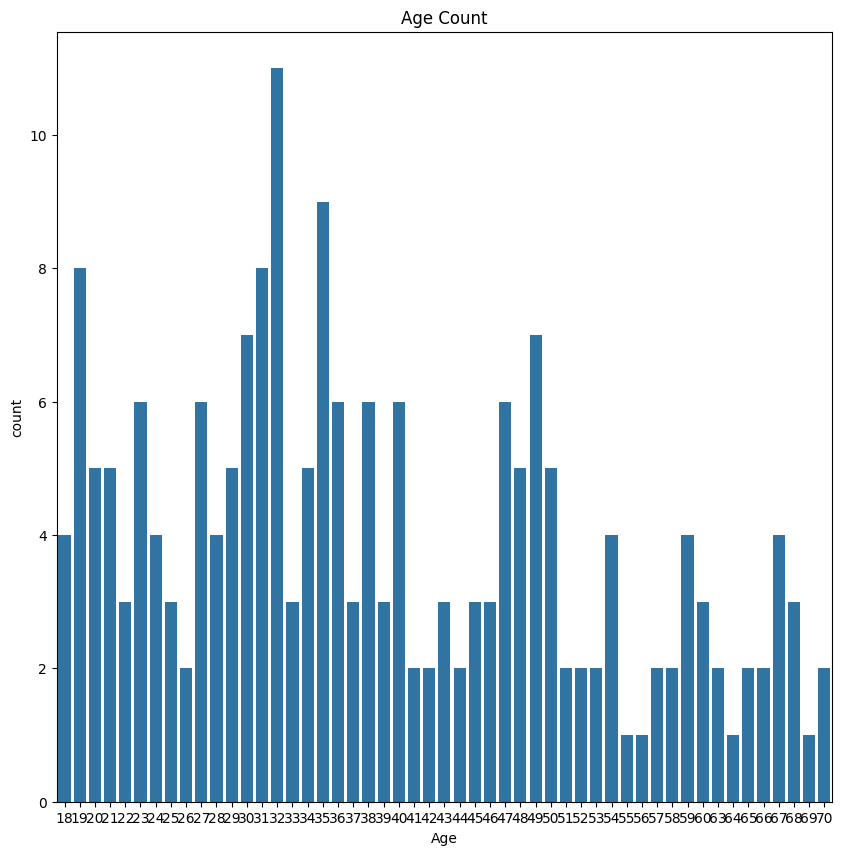

In [13]:
# average age of customer is 38
# customer who visists the mall having age between 18-70
# average annnual income-60k $
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='Age')
plt.title('Age Count')
plt.show()# we can see from the below graph that the min age is 18 and max is 70 i.e 18-70

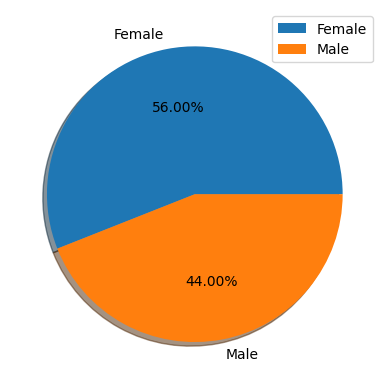

In [16]:
# show how many % of male and female visists the mall with the help of a plot(pie chart suits)
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.2f%%',shadow=True)
plt.legend()
plt.show()

In [17]:
# from above pie chart we can conclude that females visit more than males
# females are 12% more than male


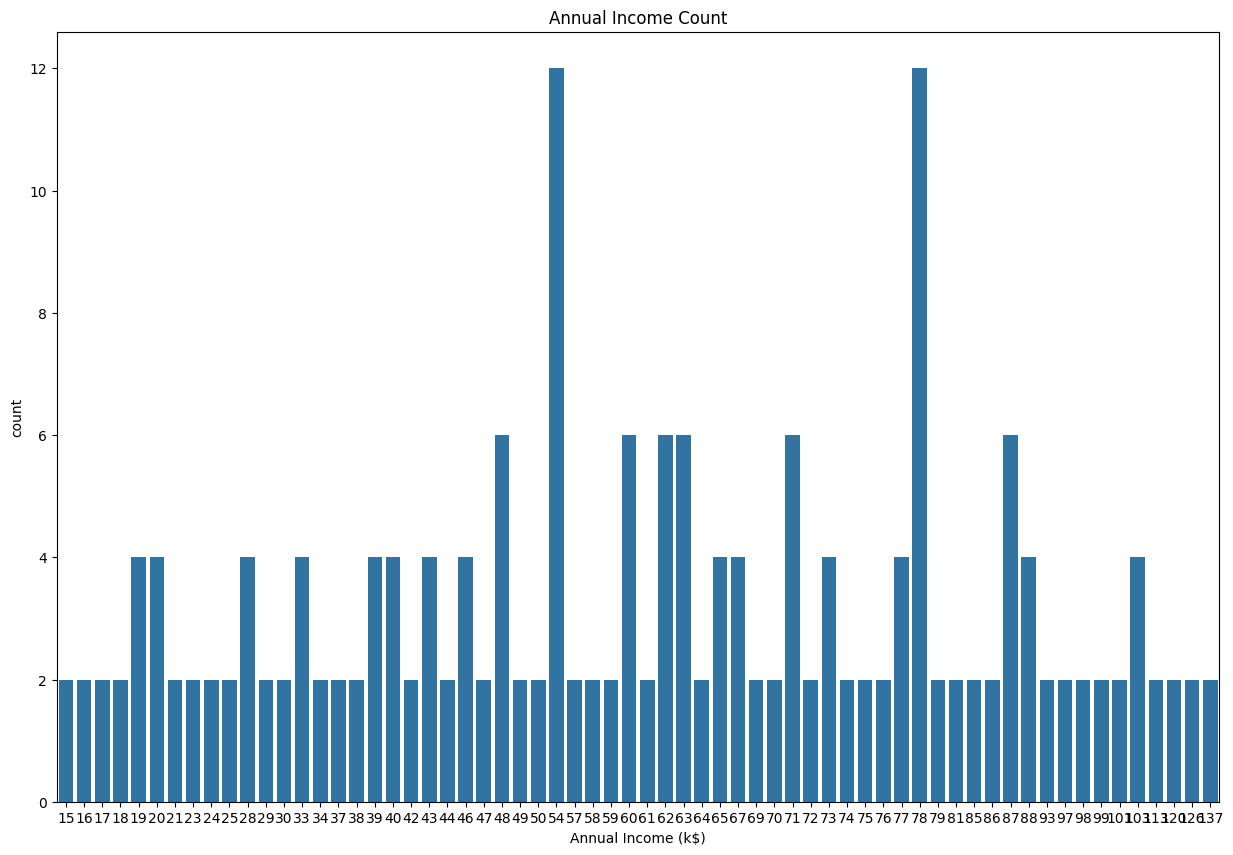

In [24]:
# distribution of income
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Annual Income (k$)')
plt.title('Annual Income Count')
plt.show()

In [25]:
# we can conclude that $54k and $78k visists mall more frequently



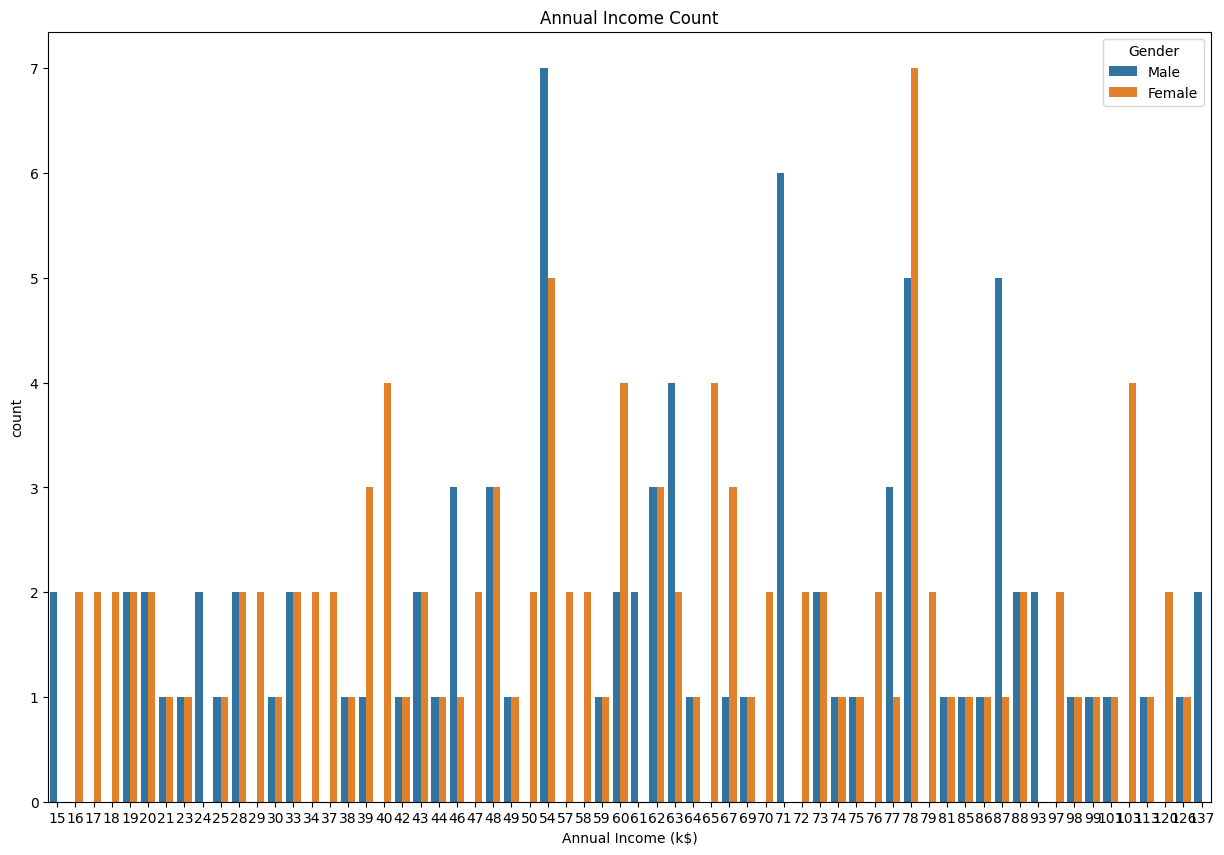

In [26]:
# show the annual income distribution with respect to gender
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Annual Income (k$)',hue='Gender')
plt.title('Annual Income Count')
plt.show()

machine learning

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# convert male and female to numericals
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [30]:
df.drop('CustomerID',axis=1,inplace=True)

In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [32]:
ssd=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,n_init=15,max_iter=500)
  kmeans.fit(df)
  ssd.append(kmeans.inertia_)
  '''Inertia: It calculates the total distance between each data point in a cluster and its centroid, squares it, and then sums it up for all data points across all clusters.
Why is it important?

Evaluating Cluster Quality: Lower inertia generally indicates better clustering, as it means data points are closer to their respective centroids, suggesting tighter and more compact clusters.
'''

In [33]:
ssd

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51132.70321257687,
 44355.31351771352,
 40655.6862137862,
 37084.67559302713]

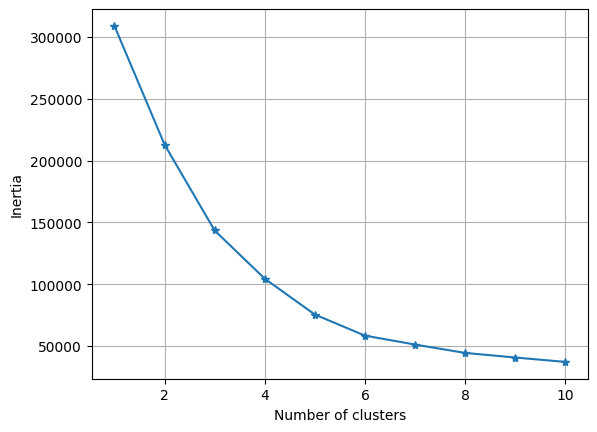

In [38]:
plt.plot(range(1,11),ssd,marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [39]:
prediction=kmeans.fit_predict(df)

In [40]:
prediction # total 10 clusters 1-9

array([9, 4, 5, 4, 9, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 9, 4, 5, 4, 9, 4,
       5, 4, 5, 4, 9, 4, 9, 4, 5, 4, 5, 4, 5, 4, 5, 4, 9, 4, 1, 4, 9, 3,
       9, 4, 1, 3, 9, 9, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 2, 0, 7, 0, 7, 0, 7, 0,
       2, 0, 2, 0, 7, 0, 2, 0, 7, 0, 3, 0, 2, 0, 7, 0, 2, 0, 7, 0, 7, 0,
       7, 0, 2, 0, 2, 0, 7, 0, 2, 0, 7, 0, 7, 0, 7, 0, 7, 0, 2, 0, 7, 0,
       7, 0, 7, 0, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8,
       6, 8], dtype=int32)

In [44]:
kmeans.cluster_centers_

array([[  0.48275862,  32.86206897,  78.55172414,  82.17241379],
       [  0.43181818,  56.34090909,  53.70454545,  49.38636364],
       [  0.7       ,  27.2       ,  76.8       ,  12.9       ],
       [  0.38235294,  27.        ,  56.79411765,  50.58823529],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.46153846,  49.        ,  24.46153846,  11.07692308],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.58823529,  48.52941176,  80.29411765,  18.76470588],
       [  0.4       ,  32.2       , 109.7       ,  82.        ],
       [  0.27272727,  36.18181818,  29.90909091,  35.09090909]])

In [46]:
len(prediction)

200

In [47]:
df['Cluster']=prediction

In [48]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,9
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,9


In [50]:
sns.color_palette(None,len(np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

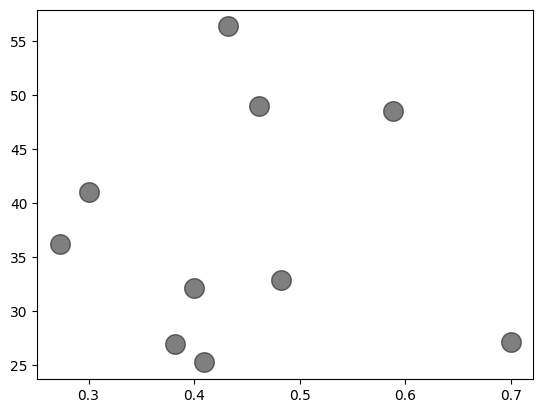

In [52]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)


In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [54]:
var=linkage(df,method='ward')

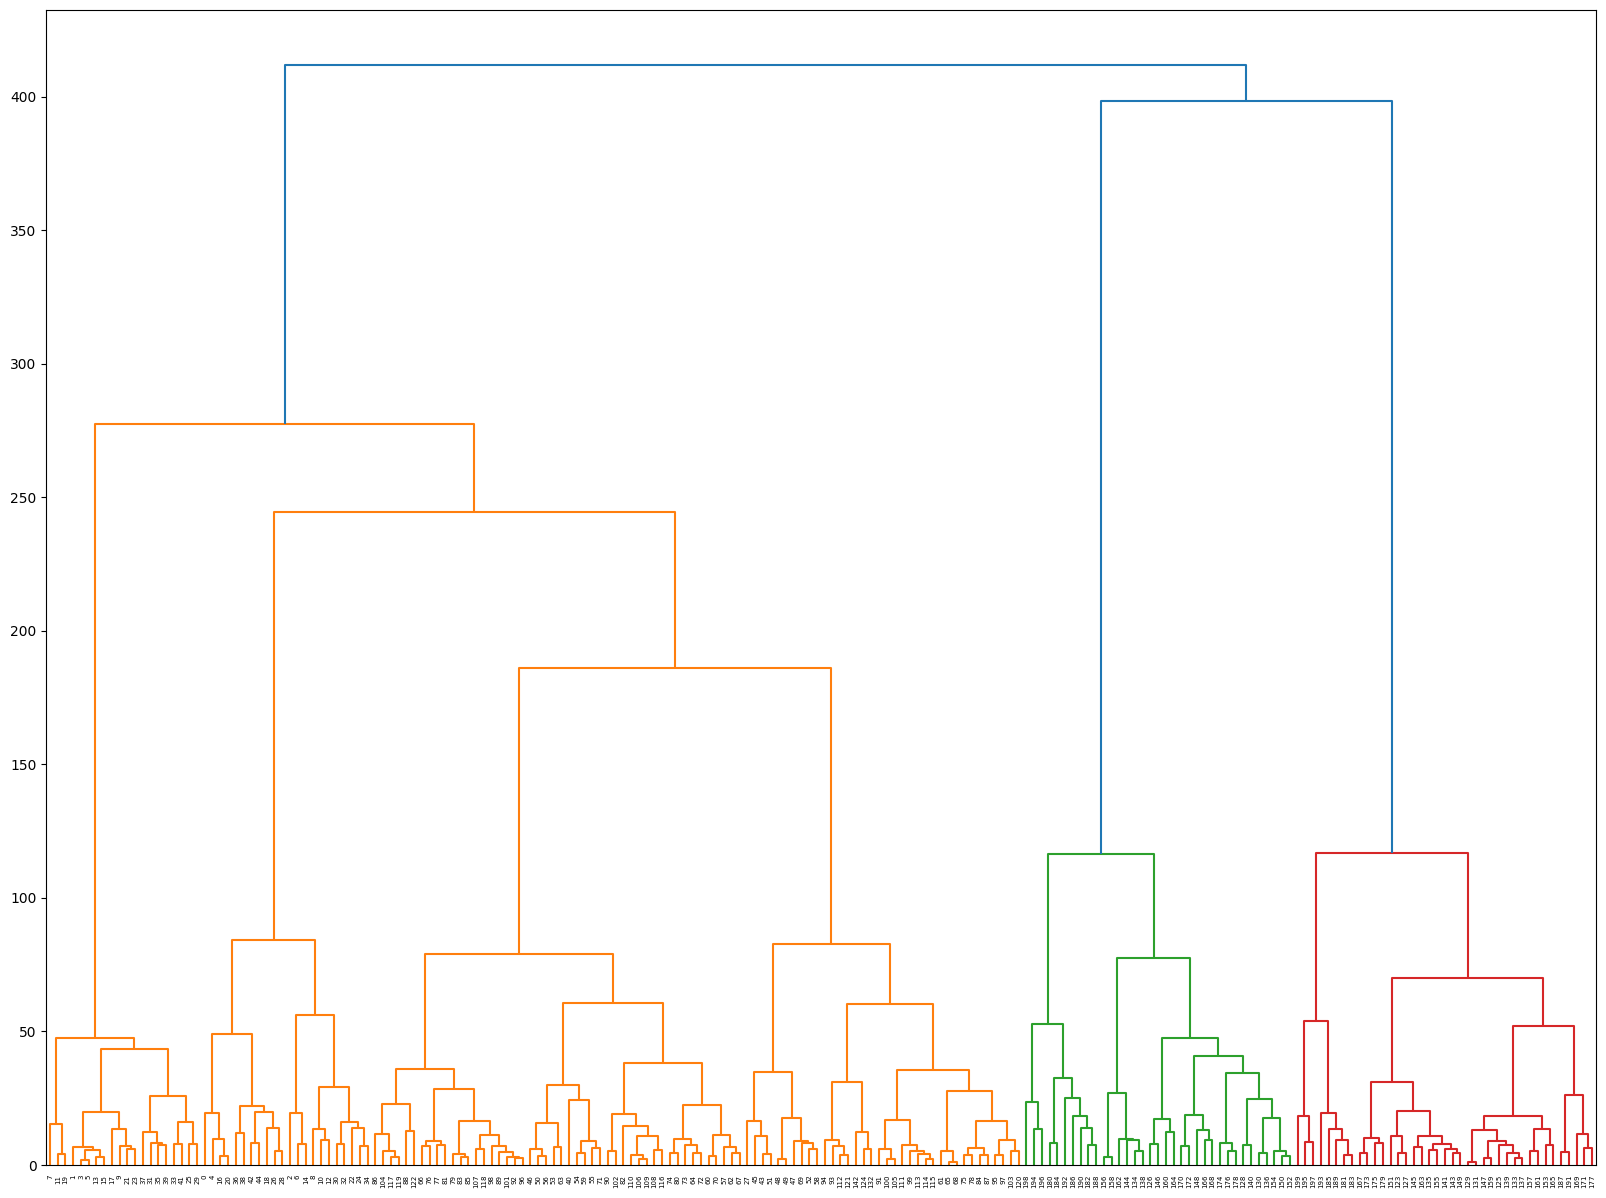

In [56]:
plt.figure(figsize=(20,15))
dendrogram(var,leaf_rotation=90)
plt.show()

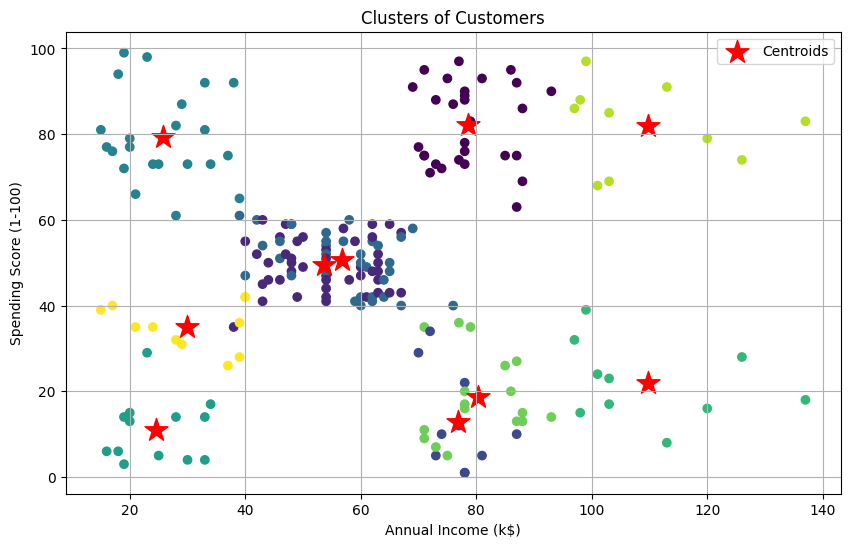

In [57]:
import matplotlib.pyplot as plt

# Assuming you have 'df' DataFrame with 'Cluster' column and features for plotting
# Replace 'Annual Income (k$)' and 'Spending Score (1-100)' with your desired features
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Scatter plot with cluster-based coloring
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='*', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()